In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SimpleRNN ,GRU

In [2]:
vocab_size = 10000
maxlen = 200

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')

print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")

Shape of x_train: (25000, 200)
Shape of x_test: (25000, 200)


## RNN Model

In [3]:
rnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128),
    SimpleRNN(128, activation='tanh', return_sequences=False),
    Dense(1, activation='sigmoid')
])

In [4]:
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,313,025
Trainable params: 1,313,025
Non-trainable params: 0
_________________________________________________________________


In [5]:
rnn_history = rnn_model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/5
313/313 [==============================] - 72s 223ms/step - loss: 0.6918 - accuracy: 0.5192 - val_loss: 0.6917 - val_accuracy: 0.5352
Epoch 2/5
313/313 [==============================] - 68s 218ms/step - loss: 0.6757 - accuracy: 0.5824 - val_loss: 0.6761 - val_accuracy: 0.5454
Epoch 3/5
313/313 [==============================] - 69s 220ms/step - loss: 0.6489 - accuracy: 0.5958 - val_loss: 0.6554 - val_accuracy: 0.5798
Epoch 4/5
313/313 [==============================] - 64s 206ms/step - loss: 0.5825 - accuracy: 0.6762 - val_loss: 0.6583 - val_accuracy: 0.5750
Epoch 5/5
313/313 [==============================] - 74s 236ms/step - loss: 0.6081 - accuracy: 0.6277 - val_loss: 0.6832 - val_accuracy: 0.5382


In [7]:
rnn_loss, rnn_accuracy = rnn_model.evaluate(x_test, y_test)
print(f"Test Loss: {rnn_loss}")
print(f"Test Accuracy: {rnn_accuracy}")

782/782 [==============================] - 8s 11ms/step - loss: 0.5072 - accuracy: 0.7790
Test Loss: 0.5072171092033386
Test Accuracy: 0.7789599895477295


## LSTM Model

In [6]:
lstm_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128),
    LSTM(128, activation='tanh', return_sequences=False),
    Dense(1, activation='sigmoid')
])

In [7]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         1280000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________


In [8]:
lstm_history = lstm_model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/5
313/313 [==============================] - 12s 27ms/step - loss: 0.6547 - accuracy: 0.5874 - val_loss: 0.4843 - val_accuracy: 0.7886
Epoch 2/5
313/313 [==============================] - 8s 26ms/step - loss: 0.6300 - accuracy: 0.6279 - val_loss: 0.6444 - val_accuracy: 0.5868
Epoch 3/5
313/313 [==============================] - 9s 29ms/step - loss: 0.6517 - accuracy: 0.6051 - val_loss: 0.6612 - val_accuracy: 0.5824
Epoch 4/5
313/313 [==============================] - 9s 27ms/step - loss: 0.6186 - accuracy: 0.6175 - val_loss: 0.6625 - val_accuracy: 0.6604
Epoch 5/5
313/313 [==============================] - 8s 27ms/step - loss: 0.6003 - accuracy: 0.6628 - val_loss: 0.6728 - val_accuracy: 0.5682


In [9]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(x_test, y_test)
print(f"Test Loss: {lstm_loss}")
print(f"Test Accuracy: {lstm_accuracy}")

782/782 [==============================] - 8s 10ms/step - loss: 0.6760 - accuracy: 0.5687
Test Loss: 0.6760417222976685
Test Accuracy: 0.5686799883842468


## GRU Model

In [10]:
gru_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128),
    GRU(128, activation='tanh', return_sequences=False),
    Dense(1, activation='sigmoid')
])

In [11]:
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

gru_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         1280000   
                                                                 
 gru (GRU)                   (None, 128)               99072     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,379,201
Trainable params: 1,379,201
Non-trainable params: 0
_________________________________________________________________


In [12]:
gru_history = gru_model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/5
313/313 [==============================] - 9s 26ms/step - loss: 0.6307 - accuracy: 0.6095 - val_loss: 0.4525 - val_accuracy: 0.8078
Epoch 2/5
313/313 [==============================] - 8s 25ms/step - loss: 0.3935 - accuracy: 0.8487 - val_loss: 0.4543 - val_accuracy: 0.8028
Epoch 3/5
313/313 [==============================] - 8s 25ms/step - loss: 0.3061 - accuracy: 0.8885 - val_loss: 0.3286 - val_accuracy: 0.8698
Epoch 4/5
313/313 [==============================] - 8s 25ms/step - loss: 0.1898 - accuracy: 0.9331 - val_loss: 0.3021 - val_accuracy: 0.8812
Epoch 5/5
313/313 [==============================] - 8s 25ms/step - loss: 0.1220 - accuracy: 0.9610 - val_loss: 0.3490 - val_accuracy: 0.8710


In [13]:
gru_loss, gru_accuracy = gru_model.evaluate(x_test, y_test)
print(f"Test Loss: {gru_loss}")
print(f"Test Accuracy: {gru_accuracy}")

782/782 [==============================] - 7s 8ms/step - loss: 0.3709 - accuracy: 0.8674
Test Loss: 0.3708721101284027
Test Accuracy: 0.86735999584198


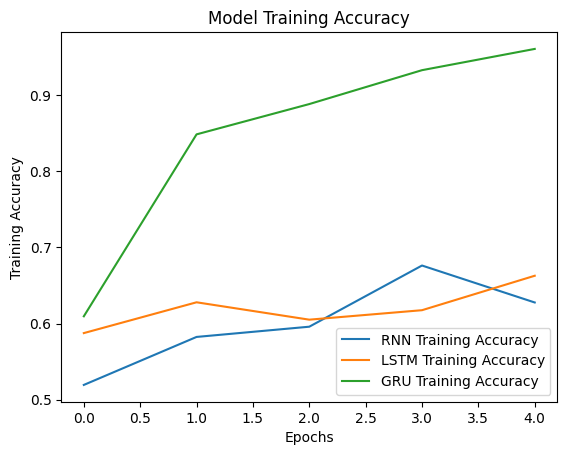

In [20]:
# plot epoch every model
import matplotlib.pyplot as plt
plt.plot(rnn_history.history['accuracy'], label='RNN Training Accuracy')
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(gru_history.history['accuracy'], label='GRU Training Accuracy')

plt.title('Model Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
# put legend in bottom right
plt.legend(loc='lower right')
plt.show()